# Preprocessing Sentinel-1 SAR GRD Images

### 1. Convert to GeoTIFF with SRS
$ *gdalwarp -r bilinear -t_srs EPSG:32648 **VV_BAND_TIFF** **DESTINATION_TIF**  *

Example: 
$ *gdalwarp -r bilinear -t_srs EPSG:32648 **S1A_IW_GRDH_1SDV_20180630T223706_20180630T223734_022592_027296_6391.SAFE/measurement/s1a-iw-grd-vv-20180630t223706-20180630t223734-022592-027296-001.tiff sar.tif** *

### (optional) 2. Scale  data to range for easier processing

$ *gdal_translate -ot **Type** -scale **old range** ** new range ** **SOURCE_TIFF** **DESTINATION_TIF**  *

**Type** = {Int16, Byte, Float32, ....}

**range** = min max

Example: 
$ *gdal_translate -ot **Byte** -scale **0 700 0 255 sar.tif sar_2.tif** *

# Maskout SAR

In [1]:
import rasterio
import numpy as np
from matplotlib import pyplot
import geopandas as gpd
import os, math
from matplotlib import pyplot as plt
from utils.landsatHepers import *

vn_reservoirs_path = 'vnreservoirs/VN_Reservoirs.shp'
df = gpd.read_file(vn_reservoirs_path)
plt.rcParams['figure.figsize'] = 7, 7
ho_tri_an = df[df.AREA_SKM == 277.4]

In [12]:
fnDs = 'Sentinel1/sar_2.tif'
src = rasterio.open(fnDs, 'r')
data, _ = getMaskFromShape(ho_tri_an, src,eps=1000)

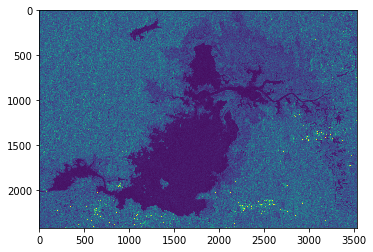

In [13]:
pyplot.imshow(data)

In [5]:
area, water_body = getWaterBody(data, 'NDWI')
water_body = normalizePixelOnBoundaries(water_body)
pyplot.imshow(water_body)

KeyboardInterrupt: 